In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
import xlsxwriter
import pandas as pd
import os,sys
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [51]:
cwd = os.getcwd()
df = pd.read_csv(cwd+'/IrCNNN_smiles_dative.csv')
df.drop(columns=['max_lambda','CN_smiles','NN_smiles'], axis=1, inplace=True)
df

complex_i  C^N  N^N   Emax  \
0             0    1    1  48.74   
1             1    2    1  48.20   
2             2    3    1  50.86   
3             3    4    1  51.23   
4             4    5    1  51.13   
...         ...  ...  ...    ...   
1435       1435  105   47  56.65   
1436       1436  106   47  54.70   
1437       1437  107   47  51.78   
1438       1438  108   47  50.86   
1439       1439  109   47  50.77   

                                         complex_smiles  
0     c1cc[c]2c(c1)-c1ccccn1->[Ir+3]213(<-n2ccccc2-c...  
1     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5cccc[c]53)...  
2     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(F)c[c]...  
3     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Cl)c[c...  
4     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Br)c[c...  
...                                                 ...  
1435  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...  
1436  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...  
1437  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...  
1438  COc1ccc2[c](c1)[Ir+3]13(<-n4cc(C(C)(C)O)ccc4-c...  
1439  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...  

[1440 rows x 5 columns]

In [52]:
def complex_name(num):
    name = 'opt_complex_xyz/IrCNNN'+str(num)+'_s.xyz'
    return name

In [53]:
df['filename'] = df['complex_i'].apply(complex_name)
df

complex_i  C^N  N^N   Emax  \
0             0    1    1  48.74   
1             1    2    1  48.20   
2             2    3    1  50.86   
3             3    4    1  51.23   
4             4    5    1  51.13   
...         ...  ...  ...    ...   
1435       1435  105   47  56.65   
1436       1436  106   47  54.70   
1437       1437  107   47  51.78   
1438       1438  108   47  50.86   
1439       1439  109   47  50.77   

                                         complex_smiles  \
0     c1cc[c]2c(c1)-c1ccccn1->[Ir+3]213(<-n2ccccc2-c...   
1     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5cccc[c]53)...   
2     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(F)c[c]...   
3     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Cl)c[c...   
4     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Br)c[c...   
...                                                 ...   
1435  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1436  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1437  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1438  COc1ccc2[c](c1)[Ir+3]13(<-n4cc(C(C)(C)O)ccc4-c...   
1439  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   

                              filename  
0        opt_complex_xyz/IrCNNN0_s.xyz  
1        opt_complex_xyz/IrCNNN1_s.xyz  
2        opt_complex_xyz/IrCNNN2_s.xyz  
3        opt_complex_xyz/IrCNNN3_s.xyz  
4        opt_complex_xyz/IrCNNN4_s.xyz  
...                                ...  
1435  opt_complex_xyz/IrCNNN1435_s.xyz  
1436  opt_complex_xyz/IrCNNN1436_s.xyz  
1437  opt_complex_xyz/IrCNNN1437_s.xyz  
1438  opt_complex_xyz/IrCNNN1438_s.xyz  
1439  opt_complex_xyz/IrCNNN1439_s.xyz  

[1440 rows x 6 columns]

In [54]:
df_cn = pd.read_csv(cwd+'/CN_smiles.csv')
df_cn.drop(columns=['CN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_cn

C^N                                    CN_smiles_clean  CN_HOMO  CN_LUMO
0     1                           C1(C2=NC=CC=C2)=CC=CC=C1  -152.27   -37.02
1     2                          CC(C=C1)=CN=C1C2=CC=CC=C2  -148.64   -35.45
2     3                       CC(C=C1)=CN=C1C2=CC=C(F)C=C2  -148.09   -35.54
3     4                      CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2  -148.71   -38.64
4     5                      CC(C=C1)=CN=C1C2=CC=C(Br)C=C2  -148.30   -39.00
5     7                     CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2  -155.15   -51.41
6     9                      CC(C=C1)=CN=C1C2=CC=C(OC)C=C2  -137.94   -32.17
7    11                      CC(C=C1)=CN=C1C2=CC=C(F)C=C2F  -150.80   -37.62
8    12                     CC(C=C1)=CN=C1C2=CC=C(F)C=C2Cl  -153.90   -35.19
9    13                     CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br  -153.68   -35.02
10   14             FC1=CC=C(C2=NC=C(C(F)(F)F)C=C2)C(F)=C1  -159.92   -48.70
11   21                             C1(N2C=CC=N2)=CC=CC=C1  -148.74   -29.01
12   28                        C12=CC=CC=C1C=CC3=CC=CN=C23  -145.83   -41.47
13   29             CC(C=C1)=CN=C1C2=CC=C(C3=CC=CC=C3)C=C2  -142.12   -40.22
14   30                   C1(C2=NC(C=CC=C3)=C3S2)=CC=CC=C1  -148.07   -47.64
15   31                   C1(C2=NC(C=CC=C3)=C3O2)=CC=CC=C1  -148.19   -45.09
16   33                  CC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -145.35   -43.07
17   34                 COC1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1  -139.72   -43.50
18   35                 COC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -140.46   -40.39
19   37                  FC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -147.99   -44.95
20   38                 ClC1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1  -148.35   -50.35
21   39                 ClC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -148.56   -48.13
22   40           FC(C1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1)(F)F  -152.59   -54.80
23   41           FC(C1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1)(F)F  -152.52   -53.20
24   42                  CC(C=C1)=CN=C1C2=CC=C(Cl)C(Cl)=C2  -151.44   -42.04
25   44                     CC(C=C1)=CN=C1C2=CC=CC(C#N)=C2  -155.42   -45.52
26   46                      CC(C=C1)=CN=C1C2=CC=CC(OC)=C2  -144.78   -35.22
27   48              CC(C=C1)=CN=C1C2=CC=C(S(C)(=O)=O)C=C2  -156.29   -47.43
28   49               CC(C=C1)=CN=C1C2=CC=C(OC(F)(F)F)C=C2  -149.10   -37.44
29   54                       CC(C=C1)=CN=C1C2=CC=C(C)C=C2  -144.55   -33.91
30   63  C1(C2=CC=CC=C2)=CC=C(C3=NC=CC(C4=CC=CC=C4)=C3)...  -144.30   -43.67
31   64                          FC1=CC=C(C2=NC=CC=C2)C=C1  -151.52   -37.13
32   65                       CC(C=C1)=CN=C1C2=CC=CC(F)=C2  -151.22   -38.49
33   66                         CC(C=C1)=CN=C1C2=CC=CC=C2F  -151.12   -37.62
34   67               FC1=CC=C(C2=NC=C(C)C=C2)C=C1C(F)(F)F  -153.16   -41.10
35   68                      CC(C=C1)=CN=C1C2=CC=CC(Cl)=C2  -151.79   -39.21
36   69                          C1(CC2=NC=CC=C2)=CC=CC=C1  -157.04   -27.37
37   70                         CCC(C=C1)=CN=C1C2=CC=CC=C2  -148.54   -35.23
38   71              C1(C2=NC=CC(C3=CC=CC=C3)=C2)=CC=CC=C1  -152.33   -41.28
39   72             CC(C(C1=CC=CC=C1)=C2)=CN=C2C3=CC=CC=C3  -148.68   -38.03
40   73                      FC1=CC=C(C2=NC=C(CC)C=C2)C=C1  -148.05   -35.25
41   74             FC1=CC=C(C2=NC=CC(C3=CC=CC=C3)=C2)C=C1  -151.58   -41.65
42   75          FC1=CC=C(C2=NC=C(C)C(C3=CC=CC=C3)=C2)C=C1  -148.12   -38.28
43   76                     ClC1=CC=C(C2=NC=C(CC)C=C2)C=C1  -148.63   -38.47
44   77            ClC1=CC=C(C2=NC=CC(C3=CC=CC=C3)=C2)C=C1  -152.05   -43.30
45   78         ClC1=CC=C(C2=NC=C(C)C(C3=CC=CC=C3)=C2)C=C1  -148.70   -40.42
46   79                     BrC1=CC=C(C2=NC=C(CC)C=C2)C=C1  -148.24   -38.83
47   80            BrC1=CC=C(C2=NC=CC(C3=CC=CC=C3)=C2)C=C1  -151.42   -43.54
48   81         BrC1=CC=C(C2=NC=C(C)C(C3=CC=CC=C3)=C2)C=C1  -148.29   -40.72
49   94          FC(OC1=CC=C(C=C1)C2=NC(C=CC=C3)=C3S2)(F)F  -147.97   -48.82
50   95           C12=CC=C(C=C1C=CC=C2)C3=NC(C=CC=C4)=C4O3  -143.19   -49.38


In [32]:
df_nn = pd.read_csv(cwd+'/NN_smiles.csv')
df_nn.drop(columns=['NN_smiles','HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_nn

N^N                                    NN_smiles_clean  NN_HOMO  NN_LUMO
0     1                           C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   -40.39
1     2                       CC1=CC(C2=NC=CC(C)=C2)=NC=C1  -153.90   -41.21
2     3                       CC1=CN=C(C2=NC=C(C)C=C2)C=C1  -148.56   -39.76
3     4                       CC1=CC=CC(C2=NC(C)=CC=C2)=N1  -150.25   -41.26
4     5  C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...  -155.88   -46.17
5     6         CC(C)(C)C1=CC(C2=NC=CC(C(C)(C)C)=C2)=NC=C1  -152.69   -40.61
6     7         FC(C1=CN=C(C2=NC=C(C(F)(F)F)C=C2)C=C1)(F)F  -169.38   -59.00
7     8                     COC1=CC(C2=NC=CC(OC)=C2)=NC=C1  -159.88   -35.25
8    14                     O=C1C2=CC=CN=C2C3=NC=CC=C3C1=O  -169.57   -87.88
9    16                        C12=NC=CC=C1C=CC3=CC=CN=C23  -153.03   -44.09
10   20              CC1=C2C(C3=NC=C(C)C(C)=C3C=C2)=NC=C1C  -147.56   -42.11
11   21       C1(C=CC=C2)=C2N=C(C3=NC(C=CC=C4)=C4C=C3)C=C1  -149.91   -53.83
12   24  C12=NC=CC(C3=CC=CC=C3)=C1C=CC4=C(C5=CC=CC=C5)C...  -148.05   -46.20
13   26                       CC1=CC2=CC=CN=C2C3=NC=CC=C31  -149.77   -43.79
14   27     CC(C1=O)(C)C2=C(C1(C)C)C3=CC=CN=C3C4=NC=CC=C42  -149.87   -44.81
15   33                  CC1=C2C(C3=NC=CC(C)=C3C=C2)=NC=C1  -149.57   -43.44
16   34                  CC1=CC=C2C(C3=NC(C)=CC=C3C=C2)=N1  -147.83   -41.26
17   37                BrC1=CC=C2C(C3=NC(Br)=CC=C3C=C2)=N1  -155.96   -52.70
18   40                             C1(C2=CC=NN2)=NC=CC=C1  -151.76   -38.81
19   41                C1(C2=NN=NN2)=NC=CC(C3=CC=CC=C3)=C1  -162.39   -51.82
20   42                     C12=CN=C(C3=NN=NN3)C=C1C=CC=C2  -155.05   -51.57
21   43       CCCCCCCCCC1=CC(C2=NC=CC(CCCCCCCCC)=C2)=NC=C1  -153.05   -39.37
22   46                                            CS(C)=O  -154.74     2.87
23   47         CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   -41.18

In [7]:
df_st = pd.read_csv(cwd+'/st_eng_IrCNNN.csv')
df_st.drop(columns=['singlet(H)','triplet(H)'],axis=1,inplace=True)
df_st

complex_i    E_T
0            1  49.55
1            2  52.96
2            3  52.72
3            4  53.09
4            5  54.75
..         ...    ...
875       1432  56.61
876       1433  55.80
877       1435  53.79
878       1436  69.15
879       1437  51.89

[880 rows x 2 columns]

In [8]:
df_hl = pd.read_csv(cwd+'/homo_lumo_IrCNNN.csv')
#df_hl.drop(columns=['HOMO_raw','LUMO_raw'], axis=1, inplace=True)
df_hl

complex_i    HOMO   LUMO  HL_gap
0             1 -136.06 -62.58   73.49
1             2 -136.11 -62.70   73.41
2             3 -139.87 -63.78   76.09
3             4 -142.56 -63.65   78.91
4             5 -146.64 -64.65   81.99
...         ...     ...    ...     ...
1049       1434 -141.37 -62.44   78.93
1050       1435 -144.99 -61.19   83.80
1051       1436 -136.21 -59.35   76.86
1052       1437 -136.35 -60.15   76.20
1053       1439 -136.27 -59.66   76.61

[1054 rows x 4 columns]

In [55]:
result1 = pd.merge(df, df_cn, how="left", on="C^N")
result = pd.merge(result1, df_nn, how="left", on="N^N")
result

complex_i  C^N  N^N   Emax  \
0             0    1    1  48.74   
1             1    2    1  48.20   
2             2    3    1  50.86   
3             3    4    1  51.23   
4             4    5    1  51.13   
...         ...  ...  ...    ...   
1435       1435  105   47  56.65   
1436       1436  106   47  54.70   
1437       1437  107   47  51.78   
1438       1438  108   47  50.86   
1439       1439  109   47  50.77   

                                         complex_smiles  \
0     c1cc[c]2c(c1)-c1ccccn1->[Ir+3]213(<-n2ccccc2-c...   
1     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5cccc[c]53)...   
2     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(F)c[c]...   
3     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Cl)c[c...   
4     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Br)c[c...   
...                                                 ...   
1435  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1436  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1437  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1438  COc1ccc2[c](c1)[Ir+3]13(<-n4cc(C(C)(C)O)ccc4-c...   
1439  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   

                              filename                    CN_smiles_clean  \
0        opt_complex_xyz/IrCNNN0_s.xyz           C1(C2=NC=CC=C2)=CC=CC=C1   
1        opt_complex_xyz/IrCNNN1_s.xyz          CC(C=C1)=CN=C1C2=CC=CC=C2   
2        opt_complex_xyz/IrCNNN2_s.xyz       CC(C=C1)=CN=C1C2=CC=C(F)C=C2   
3        opt_complex_xyz/IrCNNN3_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2   
4        opt_complex_xyz/IrCNNN4_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Br)C=C2   
...                                ...                                ...   
1435  opt_complex_xyz/IrCNNN1435_s.xyz  CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1   
1436  opt_complex_xyz/IrCNNN1436_s.xyz         FC1=CC=C(C2=CN(C)N=N2)C=C1   
1437  opt_complex_xyz/IrCNNN1437_s.xyz            CN1N=NC(C2=CC=CC=C2)=C1   
1438  opt_complex_xyz/IrCNNN1438_s.xyz           COC1=CC=C(N2C=CC=N2)C=C1   
1439  opt_complex_xyz/IrCNNN1439_s.xyz  CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1   

      CN_HOMO  CN_LUMO                             NN_smiles_clean  NN_HOMO  \
0     -152.27   -37.02                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
1     -148.64   -35.45                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
2     -148.09   -35.54                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
3     -148.71   -38.64                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
4     -148.30   -39.00                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
...       ...      ...                                         ...      ...   
1435  -154.83   -38.18  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1436  -147.04   -26.20  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1437  -147.52   -26.52  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1438  -140.15   -21.90  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1439  -143.24   -23.93  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   

      NN_LUMO  
0      -40.39  
1      -40.39  
2      -40.39  
3      -40.39  
4      -40.39  
...       ...  
1435   -41.18  
1436   -41.18  
1437   -41.18  
1438   -41.18  
1439   -41.18  

[1440 rows x 12 columns]

In [56]:
result['CN_gap'] = result['CN_LUMO'] - result['CN_HOMO']
result['NN_gap'] = result['NN_LUMO'] - result['NN_HOMO']
result['LL_gap'] = result['NN_LUMO'] - result['CN_HOMO']
result

complex_i  C^N  N^N   Emax  \
0             0    1    1  48.74   
1             1    2    1  48.20   
2             2    3    1  50.86   
3             3    4    1  51.23   
4             4    5    1  51.13   
...         ...  ...  ...    ...   
1435       1435  105   47  56.65   
1436       1436  106   47  54.70   
1437       1437  107   47  51.78   
1438       1438  108   47  50.86   
1439       1439  109   47  50.77   

                                         complex_smiles  \
0     c1cc[c]2c(c1)-c1ccccn1->[Ir+3]213(<-n2ccccc2-c...   
1     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5cccc[c]53)...   
2     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(F)c[c]...   
3     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Cl)c[c...   
4     Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Br)c[c...   
...                                                 ...   
1435  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1436  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1437  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
1438  COc1ccc2[c](c1)[Ir+3]13(<-n4cc(C(C)(C)O)ccc4-c...   
1439  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   

                              filename                    CN_smiles_clean  \
0        opt_complex_xyz/IrCNNN0_s.xyz           C1(C2=NC=CC=C2)=CC=CC=C1   
1        opt_complex_xyz/IrCNNN1_s.xyz          CC(C=C1)=CN=C1C2=CC=CC=C2   
2        opt_complex_xyz/IrCNNN2_s.xyz       CC(C=C1)=CN=C1C2=CC=C(F)C=C2   
3        opt_complex_xyz/IrCNNN3_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2   
4        opt_complex_xyz/IrCNNN4_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Br)C=C2   
...                                ...                                ...   
1435  opt_complex_xyz/IrCNNN1435_s.xyz  CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1   
1436  opt_complex_xyz/IrCNNN1436_s.xyz         FC1=CC=C(C2=CN(C)N=N2)C=C1   
1437  opt_complex_xyz/IrCNNN1437_s.xyz            CN1N=NC(C2=CC=CC=C2)=C1   
1438  opt_complex_xyz/IrCNNN1438_s.xyz           COC1=CC=C(N2C=CC=N2)C=C1   
1439  opt_complex_xyz/IrCNNN1439_s.xyz  CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1   

      CN_HOMO  CN_LUMO                             NN_smiles_clean  NN_HOMO  \
0     -152.27   -37.02                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
1     -148.64   -35.45                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
2     -148.09   -35.54                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
3     -148.71   -38.64                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
4     -148.30   -39.00                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
...       ...      ...                                         ...      ...   
1435  -154.83   -38.18  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1436  -147.04   -26.20  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1437  -147.52   -26.52  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1438  -140.15   -21.90  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
1439  -143.24   -23.93  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   

      NN_LUMO  CN_gap  NN_gap  LL_gap  
0      -40.39  115.25  119.25  111.88  
1      -40.39  113.19  119.25  108.25  
2      -40.39  112.55  119.25  107.70  
3      -40.39  110.07  119.25  108.32  
4      -40.39  109.30  119.25  107.91  
...       ...     ...     ...     ...  
1435   -41.18  116.65  109.45  113.65  
1436   -41.18  120.84  109.45  105.86  
1437   -41.18  121.00  109.45  106.34  
1438   -41.18  118.25  109.45   98.97  
1439   -41.18  119.31  109.45  102.06  

[1440 rows x 15 columns]

In [57]:
df_sub = pd.merge(df_st, df_hl, how="inner", on="complex_i")
df_sum = pd.merge(result, df_sub, how="inner", on="complex_i")
df_sum

complex_i  C^N  N^N   Emax  \
0            1    2    1  48.20   
1            2    3    1  50.86   
2            3    4    1  51.23   
3            4    5    1  51.13   
4            5    7    1  50.64   
..         ...  ...  ...    ...   
874       1432  102   47  54.91   
875       1433  103   47  54.29   
876       1435  105   47  56.65   
877       1436  106   47  54.70   
878       1437  107   47  51.78   

                                        complex_smiles  \
0    Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5cccc[c]53)...   
1    Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(F)c[c]...   
2    Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Cl)c[c...   
3    Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(Br)c[c...   
4    Cc1ccc2n(->[Ir+3]34(<-n5cc(C)ccc5-c5ccc(C#N)c[...   
..                                                 ...   
874  CC(C)(O)c1ccc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc...   
875  COC(=O)c1ccc2[c](c1)[Ir+3]13(<-n4cc(C(C)(C)O)c...   
876  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
877  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   
878  Cn1cc2n(->[Ir+3]34(<-n5cc(C(C)(C)O)ccc5-c5ccc(...   

                             filename                    CN_smiles_clean  \
0       opt_complex_xyz/IrCNNN1_s.xyz          CC(C=C1)=CN=C1C2=CC=CC=C2   
1       opt_complex_xyz/IrCNNN2_s.xyz       CC(C=C1)=CN=C1C2=CC=C(F)C=C2   
2       opt_complex_xyz/IrCNNN3_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2   
3       opt_complex_xyz/IrCNNN4_s.xyz      CC(C=C1)=CN=C1C2=CC=C(Br)C=C2   
4       opt_complex_xyz/IrCNNN5_s.xyz     CC(C=C1)=CN=C1C2=CC=C(C#N)C=C2   
..                                ...                                ...   
874  opt_complex_xyz/IrCNNN1432_s.xyz            FC1=CC=C(N2C=CC=N2)C=C1   
875  opt_complex_xyz/IrCNNN1433_s.xyz   CC(C=C1)=NN1C2=CC=C(C(OC)=O)C=C2   
876  opt_complex_xyz/IrCNNN1435_s.xyz  CN1N=NC(C2=CC=C(C(F)(F)F)C=C2)=C1   
877  opt_complex_xyz/IrCNNN1436_s.xyz         FC1=CC=C(C2=CN(C)N=N2)C=C1   
878  opt_complex_xyz/IrCNNN1437_s.xyz            CN1N=NC(C2=CC=CC=C2)=C1   

     CN_HOMO  CN_LUMO                             NN_smiles_clean  NN_HOMO  \
0    -148.64   -35.45                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
1    -148.09   -35.54                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
2    -148.71   -38.64                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
3    -148.30   -39.00                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
4    -155.15   -51.41                    C1(C2=NC=CC=C2)=NC=CC=C1  -159.64   
..       ...      ...                                         ...      ...   
874  -148.21   -29.01  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
875  -149.69   -45.01  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
876  -154.83   -38.18  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
877  -147.04   -26.20  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   
878  -147.52   -26.52  CC(O)(C)C1=CN=C(C2=NC=C(C(C)(C)O)C=C2)C=C1  -150.63   

     NN_LUMO  CN_gap  NN_gap  LL_gap    E_T    HOMO   LUMO  HL_gap  
0     -40.39  113.19  119.25  108.25  49.55 -136.06 -62.58   73.49  
1     -40.39  112.55  119.25  107.70  52.96 -136.11 -62.70   73.41  
2     -40.39  110.07  119.25  108.32  52.72 -139.87 -63.78   76.09  
3     -40.39  109.30  119.25  107.91  53.09 -142.56 -63.65   78.91  
4     -40.39  103.74  119.25  114.76  54.75 -146.64 -64.65   81.99  
..       ...     ...     ...     ...    ...     ...    ...     ...  
874   -41.18  119.20  109.45  107.03  56.61 -137.90 -60.98   76.92  
875   -41.18  104.68  109.45  108.51  55.80 -143.05 -62.10   80.94  
876   -41.18  116.65  109.45  113.65  53.79 -144.99 -61.19   83.80  
877   -41.18  120.84  109.45  105.86  69.15 -136.21 -59.35   76.86  
878   -41.18  121.00  109.45  106.34  51.89 -136.35 -60.15   76.20  

[879 rows x 19 columns]

In [58]:
df_sum['DFT_error'] = df_sum['E_T'] - df_sum['Emax']

In [59]:
df_part = df_sum[['complex_i','filename','CN_gap','NN_gap','LL_gap','HL_gap','Emax','E_T','DFT_error']]
df_part

complex_i                          filename  CN_gap  NN_gap  LL_gap  \
0            1     opt_complex_xyz/IrCNNN1_s.xyz  113.19  119.25  108.25   
1            2     opt_complex_xyz/IrCNNN2_s.xyz  112.55  119.25  107.70   
2            3     opt_complex_xyz/IrCNNN3_s.xyz  110.07  119.25  108.32   
3            4     opt_complex_xyz/IrCNNN4_s.xyz  109.30  119.25  107.91   
4            5     opt_complex_xyz/IrCNNN5_s.xyz  103.74  119.25  114.76   
..         ...                               ...     ...     ...     ...   
874       1432  opt_complex_xyz/IrCNNN1432_s.xyz  119.20  109.45  107.03   
875       1433  opt_complex_xyz/IrCNNN1433_s.xyz  104.68  109.45  108.51   
876       1435  opt_complex_xyz/IrCNNN1435_s.xyz  116.65  109.45  113.65   
877       1436  opt_complex_xyz/IrCNNN1436_s.xyz  120.84  109.45  105.86   
878       1437  opt_complex_xyz/IrCNNN1437_s.xyz  121.00  109.45  106.34   

     HL_gap   Emax    E_T  DFT_error  
0     73.49  48.20  49.55       1.35  
1     73.41  50.86  52.96       2.10  
2     76.09  51.23  52.72       1.49  
3     78.91  51.13  53.09       1.96  
4     81.99  50.64  54.75       4.11  
..      ...    ...    ...        ...  
874   76.92  54.91  56.61       1.70  
875   80.94  54.29  55.80       1.51  
876   83.80  56.65  53.79      -2.86  
877   76.86  54.70  69.15      14.45  
878   76.20  51.78  51.89       0.11  

[879 rows x 9 columns]

In [60]:
df_part.describe()

complex_i     CN_gap      NN_gap      LL_gap      HL_gap        Emax  \
count   879.000000  879.00000  879.000000  879.000000  879.000000  879.000000   
mean    664.342435  110.01066  109.984323  104.155347   74.767543   52.262696   
std     444.462704    6.85923   12.217144   15.211813    9.532098    3.464834   
min       1.000000   93.81000   81.690000   50.060000   33.670000   37.820000   
25%     265.500000  104.68000  105.980000   99.855000   73.375000   50.190000   
50%     562.000000  110.07000  109.450000  106.810000   77.000000   52.400000   
75%    1110.500000  113.50000  112.690000  110.235000   80.045000   54.490000   
max    1437.000000  129.67000  157.610000  159.910000   99.490000   71.520000   

              E_T   DFT_error  
count  879.000000  879.000000  
mean    50.080000   -2.182696  
std     10.083685   10.041366  
min     16.260000  -44.600000  
25%     48.410000   -3.795000  
50%     53.140000    1.260000  
75%     55.605000    3.170000  
max     76.200000   27.710000

In [61]:
df_part.corr()

complex_i    CN_gap    NN_gap    LL_gap    HL_gap      Emax  \
complex_i   1.000000 -0.013653  0.104794  0.113225  0.095742  0.178019   
CN_gap     -0.013653  1.000000  0.002198  0.093264  0.031233 -0.034766   
NN_gap      0.104794  0.002198  1.000000  0.885072  0.650745  0.138820   
LL_gap      0.113225  0.093264  0.885072  1.000000  0.836479  0.235914   
HL_gap      0.095742  0.031233  0.650745  0.836479  1.000000  0.315264   
Emax        0.178019 -0.034766  0.138820  0.235914  0.315264  1.000000   
E_T        -0.195418  0.023328  0.266321  0.467275  0.680902  0.183992   
DFT_error  -0.257669  0.035422  0.219543  0.387841  0.574988 -0.160289   

                E_T  DFT_error  
complex_i -0.195418  -0.257669  
CN_gap     0.023328   0.035422  
NN_gap     0.266321   0.219543  
LL_gap     0.467275   0.387841  
HL_gap     0.680902   0.574988  
Emax       0.183992  -0.160289  
E_T        1.000000   0.940727  
DFT_error  0.940727   1.000000

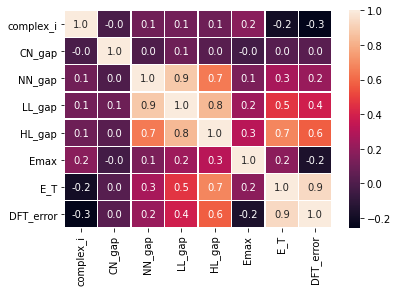

In [62]:
#correlation map
f,ax = plt.subplots()
sns.heatmap(df_part.corr(), annot=True, linewidths=.5,fmt= '.1f',ax=ax) 
plt.show()

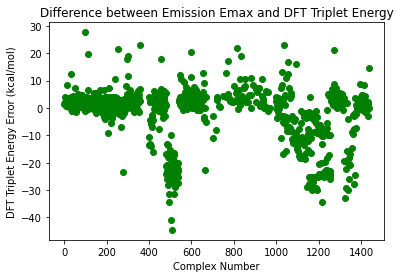

In [37]:
plt.plot(df_sum['complex_i'], df_sum['DFT_error'], 'o', color='g')
plt.title('Difference between Emission Emax and DFT Triplet Energy')
plt.xlabel('Complex Number')
plt.ylabel('DFT Triplet Energy Error (kcal/mol)')
plt.show()

In [19]:
df_sum.loc[df_sum['DFT_error']>15]

complex_i  C^N  N^N   Emax                    CN_smiles_clean  CN_HOMO  \
73          96   69    2  48.49          C1(CC2=NC=CC=C2)=CC=CC=C1  -157.04   
88         112  102    2  53.18            FC1=CC=C(N2C=CC=N2)C=C1  -148.21   
209        252   28    5  47.92        C12=CC=CC=C1C=CC3=CC=CN=C23  -145.83   
248        296  106    5  51.55         FC1=CC=C(C2=CN(C)N=N2)C=C1  -147.04   
251        299  109    5  47.92  CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1  -143.24   
294        357  107    6  50.73            CN1N=NC(C2=CC=CC=C2)=C1  -147.52   
339        456   69    8  49.03          C1(CC2=NC=CC=C2)=CC=CC=C1  -157.04   
472        597  107   16  49.71            CN1N=NC(C2=CC=CC=C2)=C1  -147.52   
529        772  102   24  51.64            FC1=CC=C(N2C=CC=N2)C=C1  -148.21   
540        816   69   26  45.78          C1(CC2=NC=CC=C2)=CC=CC=C1  -157.04   
550        836  106   26  52.64         FC1=CC=C(C2=CN(C)N=N2)C=C1  -147.04   

     CN_LUMO                                    NN_smiles_clean  NN_HOMO  \
73    -27.37                       CC1=CC(C2=NC=CC(C)=C2)=NC=C1  -153.90   
88    -29.01                       CC1=CC(C2=NC=CC(C)=C2)=NC=C1  -153.90   
209   -41.47  C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...  -155.88   
248   -26.20  C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...  -155.88   
251   -23.93  C1(C2=NC=CC(C3=CC=CC=C3)=C2)=NC=CC(C4=CC=CC=C4...  -155.88   
294   -26.52         CC(C)(C)C1=CC(C2=NC=CC(C(C)(C)C)=C2)=NC=C1  -152.69   
339   -27.37                     COC1=CC(C2=NC=CC(OC)=C2)=NC=C1  -159.88   
472   -26.52                        C12=NC=CC=C1C=CC3=CC=CN=C23  -153.03   
529   -29.01  C12=NC=CC(C3=CC=CC=C3)=C1C=CC4=C(C5=CC=CC=C5)C...  -148.05   
540   -27.37                       CC1=CC2=CC=CN=C2C3=NC=CC=C31  -149.77   
550   -26.20                       CC1=CC2=CC=CN=C2C3=NC=CC=C31  -149.77   

     NN_LUMO  CN_gap  NN_gap  LL_gap    E_T    HOMO   LUMO  HL_gap  DFT_error  
73    -41.21  129.67  112.69  115.83  76.20 -134.65 -60.70   73.95      27.71  
88    -41.21  119.20  112.69  107.00  73.08 -143.32 -61.99   81.33      19.90  
209   -46.17  104.36  109.71   99.66  69.60 -132.34 -63.87   68.46      21.68  
248   -46.17  120.84  109.71  100.87  69.60 -136.70 -62.82   73.88      18.05  
251   -46.17  119.31  109.71   97.07  67.10 -131.14 -61.57   69.57      19.18  
294   -40.61  121.00  112.08  106.91  73.87 -135.89 -57.32   78.58      23.14  
339   -35.25  129.67  124.63  121.79  66.93 -127.85 -57.08   70.77      17.90  
472   -44.09  121.00  108.94  103.43  70.24 -133.47 -59.73   73.73      20.53  
529   -46.20  119.20  101.85  102.01  68.97 -141.65 -63.98   77.67      17.33  
540   -43.79  129.67  105.98  113.25  67.89 -134.86 -62.72   72.14      22.11  
550   -43.79  120.84  105.98  103.25  71.76 -136.74 -60.17   76.57      19.12

In [20]:
df_sum.loc[df_sum['DFT_error']<-15]

complex_i  C^N  N^N   Emax  \
229        276   69    5  48.45   
311        419  109    7  54.44   
362        480    1   14  41.86   
363        481    2   14  48.37   
364        482    3   14  48.25   
365        483    4   14  48.37   
366        484    5   14  48.99   
368        486    9   14  47.09   
369        487   11   14  51.41   
371        489   13   14  48.33   
372        490   14   14  55.99   
373        491   21   14  48.45   
374        492   28   14  49.71   
375        493   29   14  55.77   
376        494   30   14  43.58   
377        496   33   14  57.16   
378        497   34   14  48.45   
379        499   37   14  52.54   
380        501   39   14  49.24   
381        502   40   14  49.37   
382        503   41   14  51.41   
383        504   42   14  57.28   
385        506   46   14  57.16   
386        507   48   14  53.98   
387        508   49   14  71.52   
388        509   54   14  43.38   
389        510   63   14  49.28   
390        511   64   14  48.57   
391        512   65   14  52.40   
392        513   66   14  49.76   
393        514   67   14  51.18   
394        515   68   14  51.36   
395        516   69   14  43.78   
396        517   70   14  43.22   
397        518   71   14  41.74   
398        519   72   14  52.59   
399        520   73   14  43.55   
400        521   74   14  52.45   
401        522   75   14  48.86   
402        523   76   14  53.58   
403        524   77   14  56.99   
404        525   78   14  56.54   
405        526   79   14  54.24   
406        527   80   14  52.40   
407        528   81   14  48.82   
408        529   94   14  51.41   
409        530   95   14  48.37   
410        531  101   14  43.35   
411        532  102   14  51.23   
412        533  103   14  51.27   
413        534  104   14  51.36   
414        535  105   14  52.79   
415        536  106   14  49.80   
416        537  107   14  48.33   
417        538  108   14  43.55   
418        539  109   14  48.57   
515        666    9   21  61.86   

                                       CN_smiles_clean  CN_HOMO  CN_LUMO  \
229                          C1(CC2=NC=CC=C2)=CC=CC=C1  -157.04   -27.37   
311                  CN1N=NC(C2=CC=C(C(C)(C)C)C=C2)=C1  -143.24   -23.93   
362                           C1(C2=NC=CC=C2)=CC=CC=C1  -152.27   -37.02   
363                          CC(C=C1)=CN=C1C2=CC=CC=C2  -148.64   -35.45   
364                       CC(C=C1)=CN=C1C2=CC=C(F)C=C2  -148.09   -35.54   
365                      CC(C=C1)=CN=C1C2=CC=C(Cl)C=C2  -148.71   -38.64   
366                      CC(C=C1)=CN=C1C2=CC=C(Br)C=C2  -148.30   -39.00   
368                      CC(C=C1)=CN=C1C2=CC=C(OC)C=C2  -137.94   -32.17   
369                      CC(C=C1)=CN=C1C2=CC=C(F)C=C2F  -150.80   -37.62   
371                     CC(C=C1)=CN=C1C2=CC=C(F)C=C2Br  -153.68   -35.02   
372             FC1=CC=C(C2=NC=C(C(F)(F)F)C=C2)C(F)=C1  -159.92   -48.70   
373                             C1(N2C=CC=N2)=CC=CC=C1  -148.74   -29.01   
374                        C12=CC=CC=C1C=CC3=CC=CN=C23  -145.83   -41.47   
375             CC(C=C1)=CN=C1C2=CC=C(C3=CC=CC=C3)C=C2  -142.12   -40.22   
376                   C1(C2=NC(C=CC=C3)=C3S2)=CC=CC=C1  -148.07   -47.64   
377                  CC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -145.35   -43.07   
378                 COC1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1  -139.72   -43.50   
379                  FC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -147.99   -44.95   
380                 ClC1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1  -148.56   -48.13   
381           FC(C1=CC=C(C2=NC(C=CC=C3)=C3S2)C=C1)(F)F  -152.59   -54.80   
382           FC(C1=CC=C(C2=NC(C=CC=C3)=C3O2)C=C1)(F)F  -152.52   -53.20   
383                  CC(C=C1)=CN=C1C2=CC=C(Cl)C(Cl)=C2  -151.44   -42.04   
385                      CC(C=C1)=CN=C1C2=CC=CC(OC)=C2  -144.78   -35.22   
386              CC(C=C1)=CN=C1C2=CC=C(S(C)(=O)=O)C=C2  -156.29   -47.43   
387               CC(C=C1)=CN=C1C2=CC=C(OC(F)(F)F)C=C2  -149.10   -37.44  

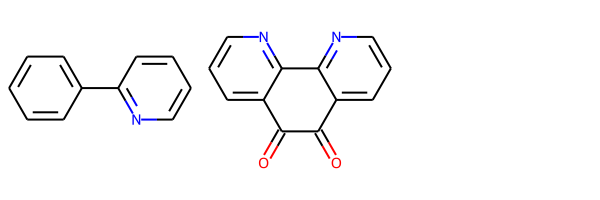

In [63]:
cn_smiles = df_sum['CN_smiles_clean'][362]
nn_smiles = df_sum['NN_smiles_clean'][362]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

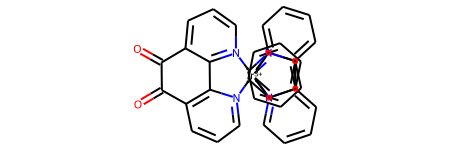

In [64]:
Ir_smiles = df_sum['complex_smiles'][362]
Ir = Chem.MolFromSmiles(Ir_smiles)
Ir

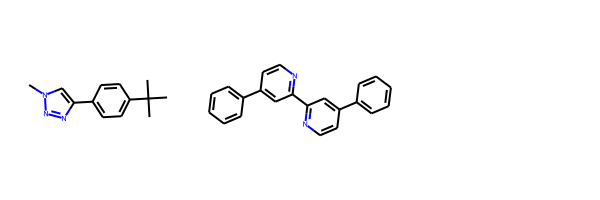

In [26]:
cn_smiles = df_sum['CN_smiles_clean'][251]
nn_smiles = df_sum['NN_smiles_clean'][251]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

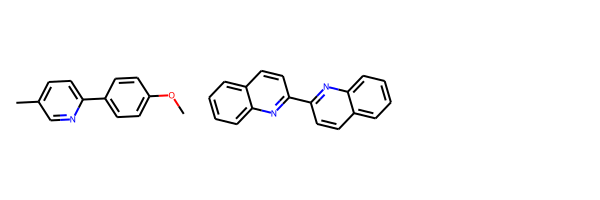

In [25]:
cn_smiles = df_sum['CN_smiles_clean'][515]
nn_smiles = df_sum['NN_smiles_clean'][515]
cn = Chem.MolFromSmiles(cn_smiles)
nn = Chem.MolFromSmiles(nn_smiles)
mol_list = [cn,nn]
img_list = Draw.MolsToGridImage(mol_list)
img_list

Text(0, 0.5, 'DFT Triplet Energy')

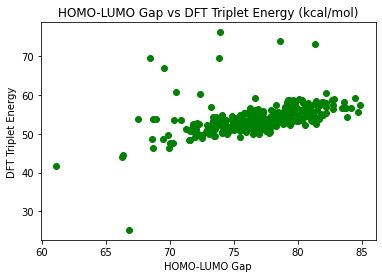

In [30]:
plt.plot(df_sum['HL_gap'], df_sum['E_T'], 'o', color='g')
plt.title('HOMO-LUMO Gap vs DFT Triplet Energy (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('DFT Triplet Energy')

Text(0, 0.5, 'Emission Emax')

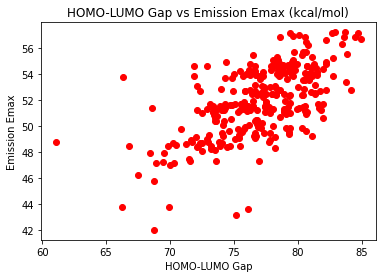

In [31]:
plt.plot(df_sum['HL_gap'], df_sum['Emax'], 'o', color='r')
plt.title('HOMO-LUMO Gap vs Emission Emax (kcal/mol)')
plt.xlabel('HOMO-LUMO Gap')
plt.ylabel('Emission Emax')

Text(0, 0.5, 'Emission Emax')

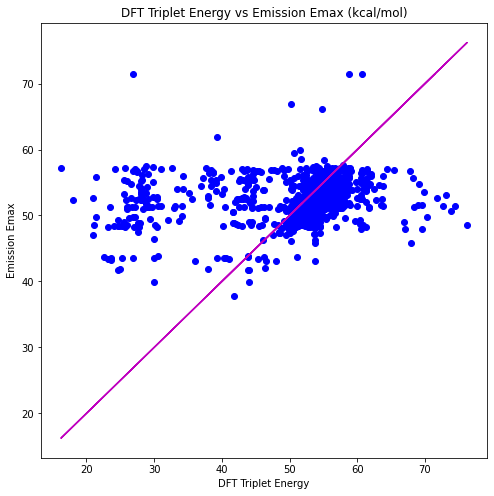

In [183]:
plt.figure(figsize=(8,8))
plt.plot(df_sum['E_T'], df_sum['Emax'], 'o', color='b')
plt.plot(df_sum['Emax'], df_sum['Emax'], '-', color='m')
plt.plot(df_sum['E_T'], df_sum['E_T'], '-', color='m')
plt.title('DFT Triplet Energy vs Emission Emax (kcal/mol)')
plt.xlabel('DFT Triplet Energy')
plt.ylabel('Emission Emax')

In [38]:
from ase.io import read,write
import dscribe
from dscribe.descriptors import CoulombMatrix
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error

### Using HL gap as descriptors

In [48]:
X_gap = df_sum[['CN_gap','NN_gap','LL_gap','HL_gap']]
y_gap = df_sum['DFT_error']

In [49]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=1)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [50]:
# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

svr.fit(X_gap, y_gap)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % non_nested_score_svr)
nested_score_svr = cross_val_score(svr, X=X_gap, y=y_gap, cv=outer_cv)
nested_score_svr_mean = nested_score_svr.mean()
print("SVR Nested Score: %.3f "
      % nested_score_svr_mean)

DFT_mae = mean_absolute_error(df_sum['Emax'], df_sum['E_T'])
print("DFT MAE: %.2f " % DFT_mae)

best_model_svr = svr.best_estimator_
ygap_svr = best_model_svr.predict(X_gap)
svr_mae = mean_absolute_error(y_gap, ygap_svr)
print("SVR CV MAE: %.3f " % svr_mae)

ygap_svr_nest = cross_val_predict(svr, X=X_gap, y=y_gap, cv=outer_cv)
svr_nest_mae = mean_absolute_error(y_gap, ygap_svr_nest)
print("SVR Nest_CV MAE: %.3f " % svr_nest_mae)

SVR Non-Nested Score: 0.556 
SVR Nested Score: 0.529 
DFT MAE: 6.64 
SVR CV MAE: 3.428 
SVR Nest_CV MAE: 4.289 


In [65]:
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

krr.fit(X_gap, y_gap)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % non_nested_score_krr)
nested_score_krr = cross_val_score(krr, X=X_gap, y=y_gap, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % nested_score_krr_mean)

best_model_krr = krr.best_estimator_
ygap_krr = best_model_krr.predict(X_gap)
krr_mae = mean_absolute_error(y_gap, ygap_krr)
print("KRR CV MAE: %.3f " % krr_mae)

ygap_krr_nest = cross_val_predict(krr, X=X_gap, y=y_gap, cv=outer_cv)
krr_nest_mae = mean_absolute_error(y_gap, ygap_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae)

KRR Non-Nested Score: 0.544 
KRR Nested Score: 0.523 
KRR CV MAE: 3.704 
KRR Nest_CV MAE: 4.554 


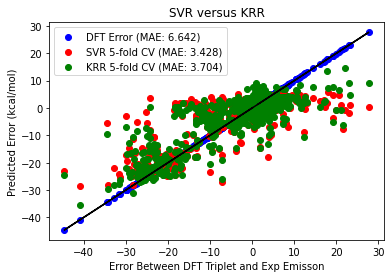

<Figure size 432x288 with 0 Axes>

In [66]:
# #############################################################################
# Look at the results
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='b',
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_gap, ygap_svr, c='r',
         label='SVR 5-fold CV (MAE: %.3f)' % (svr_mae))
plt.scatter(y_gap, ygap_krr, c='g',
         label='KRR 5-fold CV (MAE: %.3f)' % (krr_mae))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.title('SVR versus KRR')
plt.legend()

# Visualize training and prediction time
plt.figure()

plt.show()

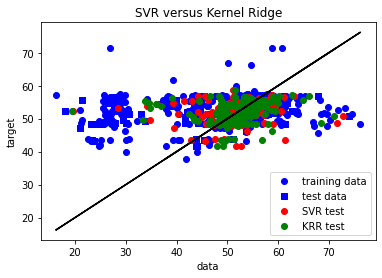

<Figure size 432x288 with 0 Axes>

In [108]:
# #############################################################################
# Look at the results
plt.plot(df_sum['Emax'], df_sum['Emax'], c='k')
plt.plot(df_sum['E_T'], df_sum['E_T'], c='k')
plt.scatter(df_train['E_T'], df_train['Emax'], c='b', marker='o',label='training data')
plt.scatter(df_test['E_T'], df_test['Emax'], c='b', marker='s',label='test data')
plt.scatter(df_test['E_T']-y_svr, df_test['Emax'], c='r',
         label='SVR test')
plt.scatter(df_test['E_T']-y_kr, df_test['Emax'], c='g',
         label='KRR test')
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

plt.show()

### Using CM

In [67]:
samples = []
maxtot = 0
for geomfile in df_sum['filename']:
    geom = read(geomfile)
    samples.append(geom)
    totnum = len(geom)
    if totnum > maxtot:
        maxtot = totnum
    
print(maxtot)
cm_desc = CoulombMatrix(n_atoms_max=maxtot,permutation="eigenspectrum")
coulomb_matrices = cm_desc.create(samples)
print(coulomb_matrices.shape)

135
(879, 135)


In [69]:
X_cm = coulomb_matrices
y_cm = df_sum['DFT_error']

# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

svr.fit(X_cm, y_cm)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % non_nested_score_svr)
nested_score_svr = cross_val_score(svr, X=X_cm, y=y_cm, cv=outer_cv)
nested_score_svr_mean = nested_score_svr.mean()
print("SVR Nested Score: %.3f "
      % nested_score_svr_mean)

DFT_mae = mean_absolute_error(df_sum['Emax'], df_sum['E_T'])
print("DFT MAE: %.2f " % DFT_mae)

best_model_svr = svr.best_estimator_
ycm_svr = best_model_svr.predict(X_cm)
svr_mae_cm = mean_absolute_error(y_cm, ycm_svr)
print("SVR CV MAE: %.3f " % svr_mae_cm)

ycm_svr_nest = cross_val_predict(svr, X=X_cm, y=y_cm, cv=outer_cv)
svr_nest_mae_cm = mean_absolute_error(y_cm, ycm_svr_nest)
print("SVR Nest_CV MAE: %.3f " % svr_nest_mae_cm)

#### KRR

krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

krr.fit(X_cm, y_cm)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % non_nested_score_krr)
nested_score_krr = cross_val_score(krr, X=X_cm, y=y_cm, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % nested_score_krr_mean)

best_model_krr = krr.best_estimator_
ycm_krr = best_model_krr.predict(X_cm)
krr_mae_cm = mean_absolute_error(y_cm, ycm_krr)
print("KRR CV MAE: %.3f " % krr_mae_cm)

ycm_krr_nest = cross_val_predict(krr, X=X_cm, y=y_cm, cv=outer_cv)
krr_nest_mae_cm = mean_absolute_error(y_cm, ycm_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae_cm)

SVR Non-Nested Score: 0.302 
SVR Nested Score: 0.297 
DFT MAE: 6.64 
SVR CV MAE: 1.529 
SVR Nest_CV MAE: 5.877 
KRR Non-Nested Score: 0.310 
KRR Nested Score: 0.295 
KRR CV MAE: 3.704 
KRR Nest_CV MAE: 5.968 


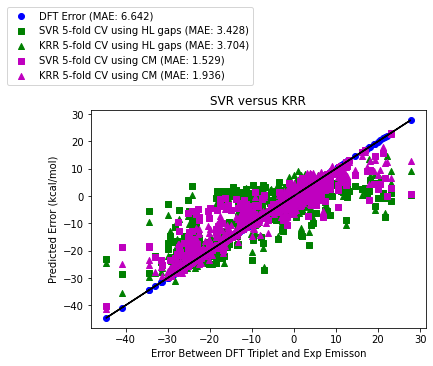

<Figure size 1440x1800 with 0 Axes>

In [76]:
# #############################################################################
# Look at the results
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='b', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_gap, ygap_svr, c='g', marker='s',
         label='SVR 5-fold CV using HL gaps (MAE: %.3f)' % (svr_mae))
plt.scatter(y_gap, ygap_krr, c='g', marker='^',
         label='KRR 5-fold CV using HL gaps (MAE: %.3f)' % (krr_mae))
plt.scatter(y_cm, ycm_svr, c='m', marker='s',
         label='SVR 5-fold CV using CM (MAE: %.3f)' % (svr_mae_cm))
plt.scatter(y_cm, ycm_krr, c='m', marker='^',
         label='KRR 5-fold CV using CM (MAE: %.3f)' % (krr_mae_cm))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.title('SVR versus KRR')
plt.legend(bbox_to_anchor=(0.5, 1.5))

# Visualize training and prediction time
plt.figure(figsize=(20,25))

plt.show()

### Using CM_full

In [146]:
cm_desc_1 = CoulombMatrix(n_atoms_max=maxtot,permutation="sorted_l2")
coulomb_matrices_1 = cm_desc_1.create(samples)
print(coulomb_matrices_1.shape)

(879, 18225)


In [147]:
X_cm_1 = coulomb_matrices_1
y_cm_1 = df_sum['DFT_error']

# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

svr.fit(X_cm_1, y_cm_1)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % non_nested_score_svr)
nested_score_svr = cross_val_score(svr, X=X_cm_1, y=y_cm_1, cv=outer_cv)
nested_score_svr_mean = nested_score_svr.mean()
print("SVR Nested Score: %.3f "
      % nested_score_svr_mean)

DFT_mae = mean_absolute_error(df_sum['Emax'], df_sum['E_T'])
print("DFT MAE: %.2f " % DFT_mae)

best_model_svr = svr.best_estimator_
ycm_1_svr = best_model_svr.predict(X_cm_1)
svr_mae_cm_1 = mean_absolute_error(y_cm_1, ycm_1_svr)
print("SVR CV MAE: %.3f " % svr_mae_cm_1)

ycm_1_svr_nest = cross_val_predict(svr, X=X_cm_1, y=y_cm_1, cv=outer_cv)
svr_nest_mae_cm_1 = mean_absolute_error(y_cm_1, ycm_1_svr_nest)
print("SVR Nest_CV MAE: %.3f " % svr_nest_mae_cm_1)

#### KRR

krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

krr.fit(X_cm_1, y_cm_1)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % non_nested_score_krr)
nested_score_krr = cross_val_score(krr, X=X_cm_1, y=y_cm_1, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % nested_score_krr_mean)

best_model_krr = krr.best_estimator_
ycm_1_krr = best_model_krr.predict(X_cm_1)
krr_mae_cm_1 = mean_absolute_error(y_cm_1, ycm_1_krr)
print("KRR CV MAE: %.3f " % krr_mae_cm_1)

ycm_1_krr_nest = cross_val_predict(krr, X=X_cm_1, y=y_cm_1, cv=outer_cv)
krr_nest_mae_cm_1 = mean_absolute_error(y_cm_1, ycm_1_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae_cm_1)

SVR Non-Nested Score: -0.003 
SVR Nested Score: -0.003 
DFT MAE: 6.64 
SVR CV MAE: 0.100 
SVR Nest_CV MAE: 7.406 
KRR Non-Nested Score: -0.048 
KRR Nested Score: -0.048 
KRR CV MAE: 0.001 
KRR Nest_CV MAE: 6.637 


### Using BoB

In [26]:
from mmltoolkit.mmltoolkit import descriptors

In [27]:
from  mmltoolkit.mmltoolkit.featurizations import *

In [41]:
atom_num_dict = {'C':6,'N':7,'O':8,'H':1,'F':9, 'Cl': 17, 'S': 16 , 'Br': 35, 'Ir': 77}

#----------------------------------------------------------------------------
def bag_of_bonds(filename_list, verbose=False):
    """
    REF:
        Hansen, et al., The Journal of Physical Chemistry Letters 2015 6 (12), 2326-2331
        DOI: 10.1021/acs.jpclett.5b00831, URL: http://pubs.acs.org/doi/abs/10.1021/acs.jpclett.5b00831
    Args:
        filename_list : a list containing strings for all of the .xyz input filenames
    Returns:
        feature_names : a (long) list of strings describing which bag each element of the feature vector is part of
        X_LBoB : a NumPy array containing the feature vectors of shape (num_mols, num_bond_types)
    """
    import copy

    num_mols = len(filename_list)

    #------- initialize empty dictionary for storing each bag as a list -----
    atom_types = ['C', 'N', 'O', 'F', 'H', 'Cl', 'S', 'Br', 'Ir']
    num_atom_types = len(atom_types)

    empty_BoB_dict = {}
    for atom_type in atom_types:
        empty_BoB_dict[atom_type] = [] #initialize empty list

    for i in range(num_atom_types):
        for j in range(i,num_atom_types):
            empty_BoB_dict[atom_types[i]+atom_types[j]] = [] #initialize empty list

    #------------- fill dicts in dict list ------------------------------------
    BoB_dict_list = []
    if (verbose): print("creating intial BoBs")

    for m, filename in enumerate(filename_list):
        xyzfile = open(filename, 'r')
        num_atoms_file = int(xyzfile.readline())
        xyzfile.close()
        Cmat = np.zeros((num_atoms_file,num_atoms_file))
        chargearray = np.zeros((num_atoms_file, 1))
        xyzmatrix = np.loadtxt(filename, skiprows=2, usecols=[1,2,3])
        atom_symbols = np.loadtxt(filename, skiprows=2, dtype=bytes, usecols=[0])
        atom_symbols = [symbol.decode('utf-8') for symbol in atom_symbols]
        chargearray = [atom_num_dict[symbol] for symbol in atom_symbols]

        BoB_dict = copy.deepcopy(empty_BoB_dict)

        #------- populate BoB dict ------------------------------------------
        for i in range(num_atoms_file):
            for j in range(i, num_atoms_file):
                if i == j:
                    BoB_dict[atom_symbols[i]] += [0.5*chargearray[i]**2.4] #concactenate to list
                else:
                    dict_key = atom_symbols[i]+atom_symbols[j]
                    dist=np.linalg.norm(xyzmatrix[i,:] - xyzmatrix[j,:])
                    CM_term = chargearray[i]*chargearray[j]/dist
                    try:
                        BoB_dict[dict_key] += [CM_term] #concactenate to list
                    except KeyError:
                        dict_key = atom_symbols[j]+atom_symbols[i]
                        BoB_dict[dict_key] += [CM_term] #concactenate to list

        BoB_dict_list += [BoB_dict]


    #------- tricky processing stage - zero pad all bags so they all have the same length
    #------- and then cocatenate all bags into a feature vector for each molecule

    #For each key in the dict, zero pad the bags, and do this for all molecules
    #also sum these up to get the total length of the final feature vector
    feature_vect_length = 0

    if (verbose): print("finding max length of each bag and padding")

    for key in BoB_dict_list[0].keys():
        max_length = 0
        #find max bag length
        for i in range(num_mols):
            length = len(BoB_dict_list[i][key])
            if (length > max_length):
                max_length = length

        if (verbose): print("max length of ", key, "is", max_length)
        #zero pad each bag
        for i in range(num_mols):
            pad_width = max_length - len(BoB_dict_list[i][key])
            BoB_dict_list[i][key] = BoB_dict_list[i][key]+[0]*pad_width
        feature_vect_length += max_length

    #initialize Numpy feature vector array
    X_BoB = np.zeros((num_mols, feature_vect_length))

    #concatenation of all bags
    if (verbose): print("concatenating the bags")

    for m in range(num_mols):
        featvec = []
        for key in BoB_dict_list[m].keys():
            featvec += sorted(BoB_dict_list[m][key], reverse=True) #Sort (finally)
        X_BoB[m,:] = np.array(featvec)

    #concatenate feature names
    feature_names = []
    for key in BoB_dict_list[0].keys():
        for element in BoB_dict_list[0][key]:
            feature_names += [key]

    return feature_names, X_BoB

In [42]:
filename_list = df_sum['filename']
BoB_feature_list, X_BoB = bag_of_bonds(filename_list, verbose=True)

creating intial BoBs
finding max length of each bag and padding
max length of  C is 62
max length of  N is 11
max length of  O is 6
max length of  F is 12
max length of  H is 68
max length of  Cl is 4
max length of  S is 4
max length of  Br is 4
max length of  Ir is 1
max length of  CC is 1891
max length of  CN is 418
max length of  CO is 252
max length of  CF is 480
max length of  CH is 4216
max length of  CCl is 208
max length of  CS is 128
max length of  CBr is 192
max length of  CIr is 62
max length of  NN is 55
max length of  NO is 36
max length of  NF is 96
max length of  NH is 480
max length of  NCl is 28
max length of  NS is 14
max length of  NBr is 16
max length of  NIr is 11
max length of  OO is 15
max length of  OF is 24
max length of  OH is 272
max length of  OCl is 8
max length of  OS is 24
max length of  OBr is 8
max length of  OIr is 6
max length of  FF is 66
max length of  FH is 480
max length of  FCl is 12
max length of  FS is 24
max length of  FBr is 20
max length of 

In [47]:
X_BoB.shape

(879, 12634)

In [143]:
print(svr.best_params_)

{'C': 10, 'gamma': 0.0001}


In [151]:
X_BoB_1 = X_BoB
y_BoB_1 = df_sum['DFT_error']

# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, 
                   scoring='neg_mean_absolute_error', cv=inner_cv)

svr.fit(X_BoB_1, y_BoB_1)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % -non_nested_score_svr)

best_model_svr = svr.best_estimator_
print(best_model_svr)
yBoB_1_svr = best_model_svr.predict(X_BoB_1)
svr_mae_BoB_1 = mean_absolute_error(y_BoB_1, yBoB_1_svr)
print("SVR CV MAE: %.3f " % svr_mae_BoB_1)

nested_score_svr = cross_val_score(svr, X=X_BoB_1, y=y_BoB_1, cv=outer_cv)
nested_score_svr_mean = nested_score_svr.mean()
print("SVR Nested Score: %.3f "
      % -nested_score_svr_mean)

yBoB_1_svr_nest = cross_val_predict(svr, X=X_BoB_1, y=y_BoB_1, cv=outer_cv)
svr_nest_mae_BoB_1 = mean_absolute_error(y_BoB_1, yBoB_1_svr_nest)
print("SVR Nest_CV MAE: %.3f " % svr_nest_mae_BoB_1)

#### KRR


nested_score_krr = cross_val_score(krr, X=X_BoB_1, y=y_BoB_1, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % -nested_score_krr_mean)

yBoB_1_krr_nest = cross_val_predict(krr, X=X_BoB_1, y=y_BoB_1, cv=outer_cv)
krr_nest_mae_BoB_1 = mean_absolute_error(y_BoB_1, yBoB_1_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae_BoB_1)

SVR Non-Nested Score: 6.216 
SVR(C=10, gamma=0.0001)
SVR CV MAE: 2.510 


KeyboardInterrupt: 

In [187]:
def train_svr(X, y, scoring):
    svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, 
                   scoring=scoring, cv=inner_cv, return_train_score=True)

    svr.fit(X, y)
    non_nested_score_svr = svr.best_score_
    print("svr Non-Nested Score: %.3f "
          % -non_nested_score_svr)

    best_model_svr = svr.best_estimator_
    print(best_model_svr)
    y_svr = best_model_svr.predict(X)
    svr_mae = mean_absolute_error(y, y_svr)
    print("svr CV MAE: %.3f " % svr_mae)
    train_score = -svr.cv_results_['mean_train_score'][svr.best_index_]
    print("svr CV Train MAE: %.3f " % train_score)
    test_score = -svr.cv_results_['mean_test_score'][svr.best_index_]
    print("svr CV Test MAE: %.3f " % test_score)
    return y_svr, svr_mae, train_score, test_score

In [177]:
def train_krr(X, y, scoring):
    krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, 
                   scoring=scoring, cv=inner_cv, return_train_score=True)

    krr.fit(X, y)
    non_nested_score_krr = krr.best_score_
    print("KRR Non-Nested Score: %.3f "
          % -non_nested_score_krr)

    best_model_krr = krr.best_estimator_
    print(best_model_krr)
    y_krr = best_model_krr.predict(X)
    krr_mae = mean_absolute_error(y, y_krr)
    print("KRR CV MAE: %.3f " % krr_mae)
    train_score = -krr.cv_results_['mean_train_score'][krr.best_index_]
    print("KRR CV Train MAE: %.3f " % train_score)
    test_score = -krr.cv_results_['mean_test_score'][krr.best_index_]
    print("KRR CV Test MAE: %.3f " % test_score)
    return y_krr, krr_mae, train_score, test_score

In [188]:
ycm_svr, svr_mae_cm, train_mae_svr_cm, test_mae_svr_cm = train_svr(X_cm,y_cm,'neg_mean_absolute_error')

svr Non-Nested Score: 5.778 
SVR(C=100, gamma=0.00046415888336127773)
svr CV MAE: 1.529 
svr CV Train MAE: 1.473 
svr CV Test MAE: 5.778 


In [189]:
ycm_1_svr, svr_mae_cm_1, train_mae_svr_cm_1, test_mae_svr_cm_1 = train_svr(X_cm_1,y_cm_1,'neg_mean_absolute_error')

svr Non-Nested Score: 6.503 
SVR(C=1, gamma=0.0001)
svr CV MAE: 5.635 
svr CV Train MAE: 5.635 
svr CV Test MAE: 6.503 


In [190]:
ygap_svr, svr_mae_gap, train_mae_svr_gap, test_mae_svr_gap = train_svr(X_gap,y_gap,'neg_mean_absolute_error')

svr Non-Nested Score: 4.187 
SVR(C=10, gamma=0.01)
svr CV MAE: 3.428 
svr CV Train MAE: 3.399 
svr CV Test MAE: 4.187 


In [191]:
ySoB_svr, svr_mae_SoB, train_mae_svr_SoB, test_mae_svr_SoB = train_svr(X_SoB,y_SoB,'neg_mean_absolute_error')

svr Non-Nested Score: 4.006 
SVR(C=1000, gamma=0.002154434690031882)
svr CV MAE: 2.961 
svr CV Train MAE: 2.883 
svr CV Test MAE: 4.006 


In [193]:
yBoB_svr, svr_mae_BoB, train_mae_svr_BoB, test_mae_svr_BoB = train_svr(X_BoB,y_BoB,'neg_mean_absolute_error')

KeyboardInterrupt: 

In [192]:
ygap_krr, krr_mae_gap, train_mae_krr_gap, test_mae_krr_gap = train_krr(X_gap,y_gap,'neg_mean_absolute_error')

KRR Non-Nested Score: 4.422 
KernelRidge(alpha=0.1, gamma=0.004641588833612777, kernel='rbf')
KRR CV MAE: 3.704 
KRR CV Train MAE: 3.684 
KRR CV Test MAE: 4.422 


In [184]:
ycm_krr, krr_mae_cm, train_mae_krr_cm, test_mae_krr_cm = train_krr(X_cm,y_cm,'neg_mean_absolute_error')

KRR Non-Nested Score: 5.920 
KernelRidge(alpha=0.1, gamma=0.00046415888336127773, kernel='rbf')
KRR CV MAE: 2.770 
KRR CV Train MAE: 2.731 
KRR CV Test MAE: 5.920 


In [178]:
ycm_1_krr, krr_mae_cm_1, train_mae_krr_cm_1, test_mae_krr_cm_1 = train_krr(X_cm_1,y_cm_1,'neg_mean_absolute_error')

KRR Non-Nested Score: 6.637 
KernelRidge(alpha=0.0001, gamma=0.0001, kernel='rbf')
KRR CV MAE: 0.001 
KRR CV Train MAE: 0.001 
KRR CV Test MAE: 6.637 


In [ ]:
yBoB_krr, krr_mae_BoB, train_mae_krr_BoB, test_mae_krr_BoB = train_krr(X_BoB,y_BoB,'neg_mean_absolute_error')

In [194]:
ySoB_krr, krr_mae_SoB, train_mae_krr_SoB, test_mae_krr_SoB = train_krr(X_SoB,y_SoB,'neg_mean_absolute_error')

KRR Non-Nested Score: 4.239 
KernelRidge(alpha=0.0001, gamma=0.0001, kernel='rbf')
KRR CV MAE: 3.800 
KRR CV Train MAE: 3.802 
KRR CV Test MAE: 4.239 


In [176]:
print(train_mae_krr_BoB_1, test_mae_krr_BoB_1)

0.1951611916725744 6.232690018940129


In [166]:
krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, 
                   scoring='neg_mean_absolute_error', cv=inner_cv, return_train_score=True)

krr.fit(X_BoB_1, y_BoB_1)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % -non_nested_score_krr)

best_model_krr = krr.best_estimator_
print(best_model_krr)
yBoB_1_krr = best_model_krr.predict(X_BoB_1)
krr_mae_BoB_1 = mean_absolute_error(y_BoB_1, yBoB_1_krr)
print("KRR CV MAE: %.3f " % krr_mae_BoB_1)

KRR Non-Nested Score: 6.233 
KernelRidge(alpha=0.01, gamma=0.0001, kernel='rbf')
KRR CV MAE: 0.215 


In [167]:
krr.cv_results_

{'mean_fit_time': array([0.28262978, 0.11708937, 0.12331066, 0.15421653, 0.13394003,
        0.12660909, 0.1231544 , 0.12030635, 0.11902165, 0.1167213 ,
        0.11678901, 0.11623077, 0.12293015, 0.15566158, 0.13416424,
        0.12853808, 0.12328525, 0.11871157, 0.11853375, 0.118643  ,
        0.12058291, 0.12431364, 0.17659874, 0.17155085, 0.17304935,
        0.14996624, 0.12226548, 0.12119751, 0.1565032 , 0.12755938,
        0.14786382, 0.18218393, 0.13565626, 0.1744462 , 0.15358224,
        0.14112349, 0.1355813 , 0.13155341, 0.12472358, 0.1386445 ,
        0.13421602, 0.13329697, 0.13324041, 0.15762119, 0.13644338,
        0.13494554, 0.12616262, 0.12177057, 0.12205868, 0.12387013]),
 'std_fit_time': array([3.05974472e-01, 1.27243193e-03, 1.69127771e-03, 4.44204144e-03,
        7.60084075e-04, 9.96041352e-04, 7.84168930e-03, 7.01032148e-03,
        3.97287002e-03, 1.96763622e-03, 1.81513539e-03, 8.94310314e-04,
        1.28315751e-03, 3.67238769e-03, 1.22839122e-03, 1.34152278e-0

In [171]:
krr.cv_results_['mean_train_score'][krr.best_index_]

-0.1951611916725744

In [172]:
krr.cv_results_['mean_test_score'][krr.best_index_]

-6.232690018940129

In [145]:
y_BoB = df_sum['DFT_error']

# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, 
                   cv=inner_cv)

svr.fit(X_BoB, y_BoB)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % -non_nested_score_svr)

best_model_svr = svr.best_estimator_
print(best_model_svr)
yBoB_svr = best_model_svr.predict(X_BoB)
svr_mae_BoB = mean_absolute_error(y_BoB, yBoB_svr)
print("SVR CV MAE: %.3f " % svr_mae_BoB)

nested_score_svr = cross_val_score(svr, X=X_BoB, y=y_BoB, cv=outer_cv)
nested_score_svr_mean = nested_score_svr.mean()
print("SVR Nested Score: %.3f "
      % -nested_score_svr_mean)

yBoB_svr_nest = cross_val_predict(svr, X=X_BoB, y=y_BoB, cv=outer_cv)
svr_nest_mae_BoB = mean_absolute_error(y_BoB, yBoB_svr_nest)
print("SVR Nest_CV MAE: %.3f " % svr_nest_mae_BoB)

#### KRR

krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, 
                  cv=inner_cv)

krr.fit(X_BoB, y_BoB)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % -non_nested_score_krr)

best_model_krr = krr.best_estimator_
print(best_model_krr)
yBoB_krr = best_model_krr.predict(X_BoB)
krr_mae_BoB = mean_absolute_error(y_BoB, yBoB_krr)
print("KRR CV MAE: %.3f " % krr_mae_BoB)

nested_score_krr = cross_val_score(krr, X=X_BoB, y=y_BoB, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % -nested_score_krr_mean)

yBoB_krr_nest = cross_val_predict(krr, X=X_BoB, y=y_BoB, cv=outer_cv)
krr_nest_mae_BoB = mean_absolute_error(y_BoB, yBoB_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae_BoB)

SVR Non-Nested Score: -0.114 
SVR(C=1000, gamma=0.0001)
SVR CV MAE: 0.101 
SVR Nested Score: -0.095 
SVR Nest_CV MAE: 6.468 
KRR Non-Nested Score: -0.062 
KernelRidge(alpha=0.1, gamma=0.0001, kernel='rbf')
KRR CV MAE: 1.125 
KRR Nested Score: -0.057 
KRR Nest_CV MAE: 6.335 


### Using Sum_over_Bonds

In [78]:
from mmltoolkit.mmltoolkit.featurizations import sum_over_bonds

In [80]:
mol_list = [Chem.AddHs(Chem.MolFromSmiles(smile)) for smile in df_sum['complex_smiles']]
bond_types, X_SoB  = sum_over_bonds(mol_list)

In [81]:
bond_types

['C-C',
 'C:C',
 'C:N',
 'Ir->N',
 'C-Ir',
 'C-H',
 'C-F',
 'C-Cl',
 'Br-C',
 'C#N',
 'C-N',
 'N:N',
 'C:O',
 'C-O',
 'C:S',
 'C=O',
 'C-S',
 'O=S',
 'H-N',
 'Ir->O',
 'H-O']

In [84]:
X_SoB.shape

(879, 21)

In [85]:
y_SoB = df_sum['DFT_error']

# #############################################################################
# Fit regression model
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.01),
                   param_grid={"C": [1, 10, 100, 1000],
                               "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

svr.fit(X_SoB, y_SoB)
non_nested_score_svr = svr.best_score_
print("SVR Non-Nested Score: %.3f "
      % non_nested_score_svr)
#nested_score_svr = cross_val_score(svr, X=X_SoB, y=y_SoB, cv=outer_cv)
#nested_score_svr_mean = nested_score_svr.mean()
#print("SVR Nested Score: %.3f "
#      % nested_score_svr_mean)

best_model_svr = svr.best_estimator_
ySoB_svr = best_model_svr.predict(X_SoB)
svr_mae_SoB = mean_absolute_error(y_SoB, ySoB_svr)
print("SVR CV MAE: %.3f " % svr_mae_SoB)

#ySoB_svr_nest = cross_val_predict(svr, X=X_SoB, y=y_SoB, cv=outer_cv)
#svr_nest_mae_SoB = mean_absolute_error(y_SoB, ySoB_svr_nest)
#print("SVR Nest_CV MAE: %.3f " % svr_nest_mae_SoB)

#### KRR

krr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.01),
                  param_grid={"alpha": [1, 0.1, 0.01, 0.001, 0.0001],
                              "gamma": np.logspace(-4, -1, 10)}, cv=inner_cv)

krr.fit(X_SoB, y_SoB)
non_nested_score_krr = krr.best_score_
print("KRR Non-Nested Score: %.3f "
      % non_nested_score_krr)

best_model_krr = krr.best_estimator_
ySoB_krr = best_model_krr.predict(X_SoB)
krr_mae_SoB = mean_absolute_error(y_SoB, ySoB_krr)
print("KRR CV MAE: %.3f " % krr_mae_SoB)



SVR Non-Nested Score: 0.618 
SVR CV MAE: 2.961 
KRR Non-Nested Score: 0.603 
KRR CV MAE: 3.387 


In [88]:
nested_score_krr = cross_val_score(krr, X=X_SoB, y=y_SoB, cv=outer_cv)
nested_score_krr_mean = nested_score_krr.mean()
print("KRR Nested Score: %.3f "
      % nested_score_krr_mean)

ySoB_krr_nest = cross_val_predict(krr, X=X_SoB, y=y_SoB, cv=outer_cv)
krr_nest_mae_SoB = mean_absolute_error(y_SoB, ySoB_krr_nest)
print("KRR Nest_CV MAE: %.3f " % krr_nest_mae_SoB)

KRR Nested Score: 0.593 
KRR Nest_CV MAE: 4.283 


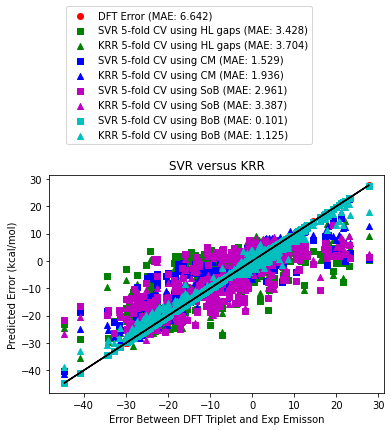

<Figure size 2160x1440 with 0 Axes>

In [149]:
# #############################################################################
# Look at the results
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_gap, ygap_svr, c='g', marker='s',
         label='SVR 5-fold CV using HL gaps (MAE: %.3f)' % (svr_mae))
plt.scatter(y_gap, ygap_krr, c='g', marker='^',
         label='KRR 5-fold CV using HL gaps (MAE: %.3f)' % (krr_mae))

plt.scatter(y_cm, ycm_svr, c='b', marker='s',
         label='SVR 5-fold CV using CM (MAE: %.3f)' % (svr_mae_cm))
plt.scatter(y_cm, ycm_krr, c='b', marker='^',
         label='KRR 5-fold CV using CM (MAE: %.3f)' % (krr_mae_cm))

plt.scatter(y_SoB, ySoB_svr, c='m', marker='s',
         label='SVR 5-fold CV using SoB (MAE: %.3f)' % (svr_mae_SoB))
plt.scatter(y_SoB, ySoB_krr, c='m', marker='^',
         label='KRR 5-fold CV using SoB (MAE: %.3f)' % (krr_mae_SoB))

plt.scatter(y_BoB, yBoB_svr, c='c', marker='s',
         label='SVR 5-fold CV using BoB (MAE: %.3f)' % (svr_mae_BoB))
plt.scatter(y_BoB, yBoB_krr, c='c', marker='^',
         label='KRR 5-fold CV using BoB (MAE: %.3f)' % (krr_mae_BoB))

plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.title('SVR versus KRR')
plt.legend(bbox_to_anchor=(0.8, 1.8))

# Visualize training and prediction time
plt.figure(figsize=(30,20))

plt.show()

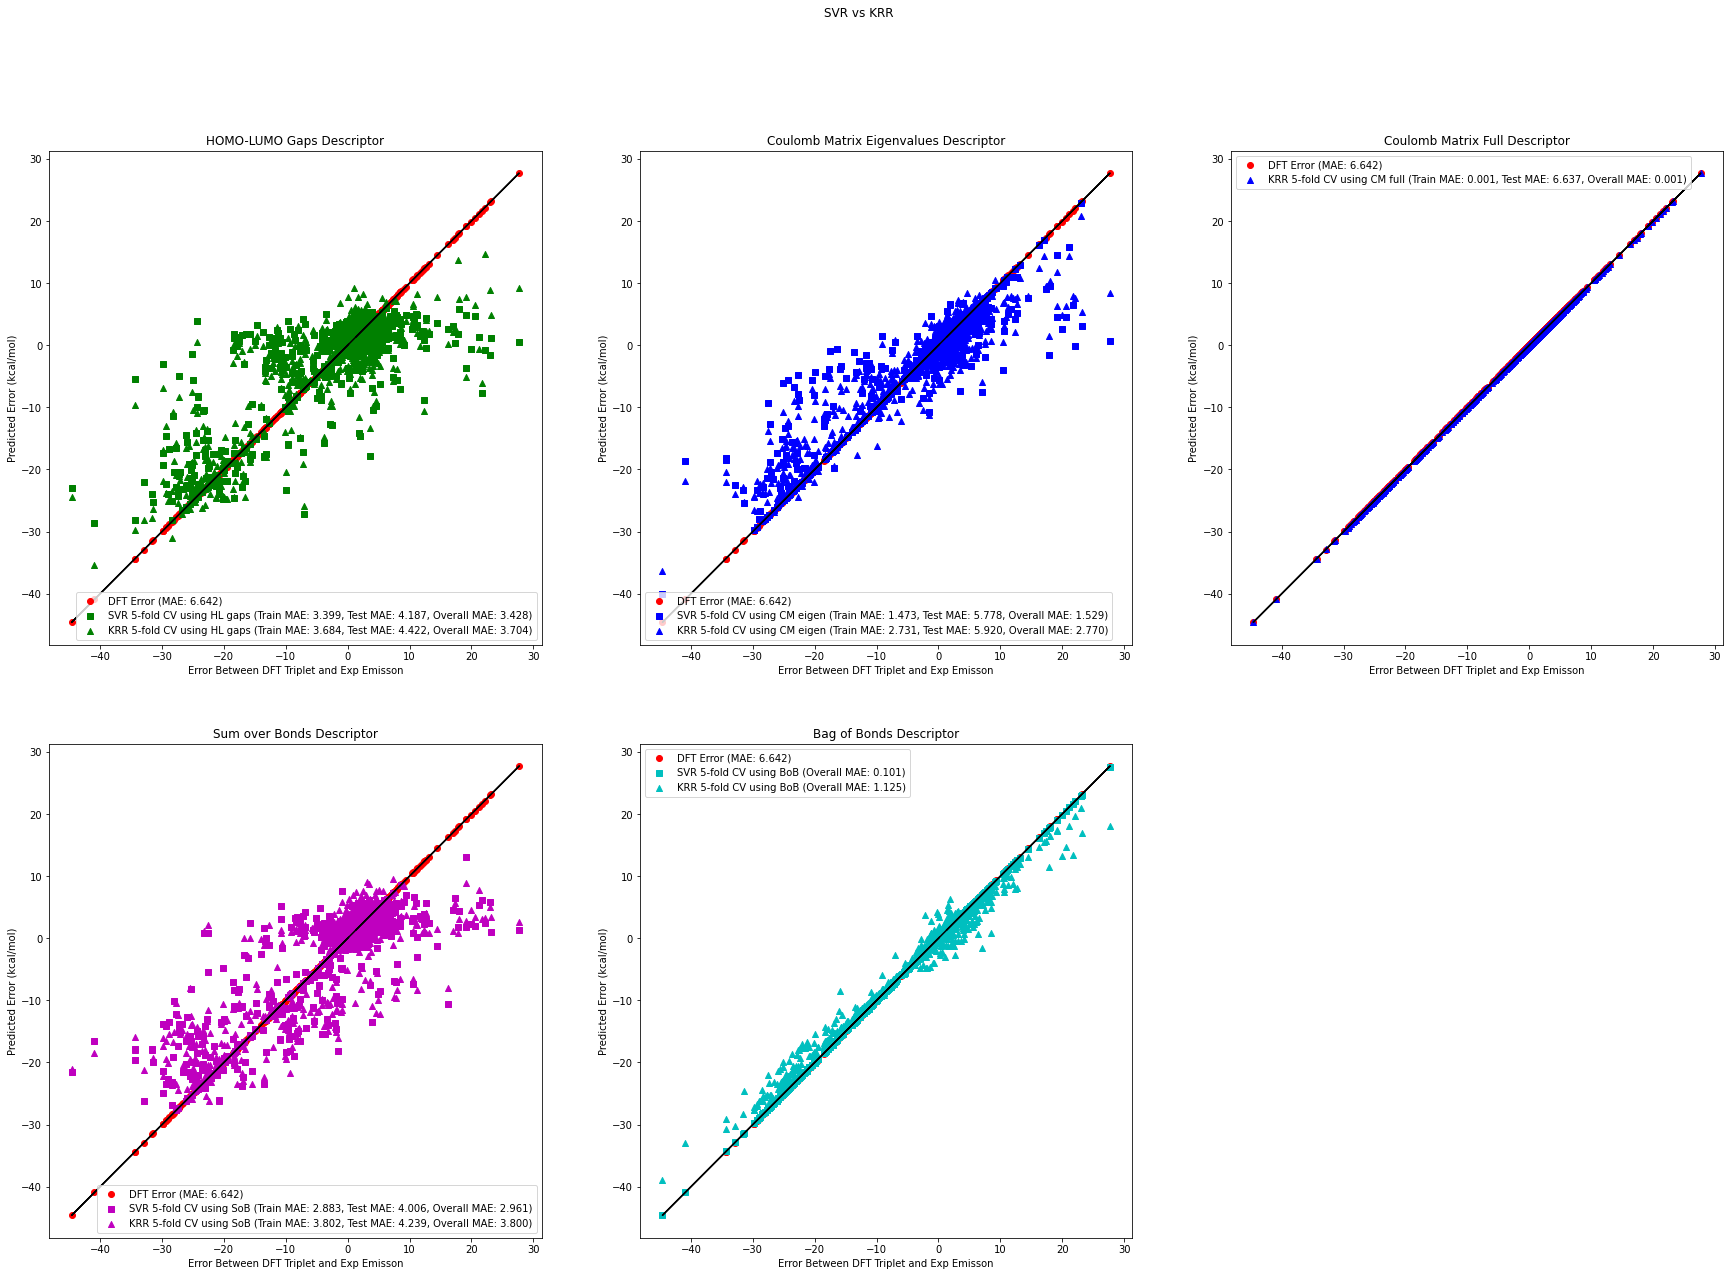

In [198]:
# #############################################################################
# Look at the results

plt.figure(figsize=(30,20))
plt.subplot(231)
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_gap, ygap_svr, c='g', marker='s',
         label='SVR 5-fold CV using HL gaps (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_svr_gap, test_mae_svr_gap, svr_mae_gap))
plt.scatter(y_gap, ygap_krr, c='g', marker='^',
         label='KRR 5-fold CV using HL gaps (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_krr_gap, test_mae_krr_gap, krr_mae_gap))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.gca().set_title('HOMO-LUMO Gaps Descriptor')
plt.legend()

plt.subplot(232)
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_cm, ycm_svr, c='b', marker='s',
         label='SVR 5-fold CV using CM eigen (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_svr_cm, test_mae_svr_cm, svr_mae_cm))
plt.scatter(y_cm, ycm_krr, c='b', marker='^',
         label='KRR 5-fold CV using CM eigen (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_krr_cm, test_mae_krr_cm, krr_mae_cm))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.gca().set_title('Coulomb Matrix Eigenvalues Descriptor')
plt.legend()

plt.subplot(233)
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
#plt.scatter(y_cm_1, ycm_1_svr, c='b', marker='s',
#         label='SVR 5-fold CV using CM full (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_svr_cm_1, test_mae_svr_cm_1, svr_mae_cm_1))
plt.scatter(y_cm_1, ycm_1_krr, c='b', marker='^',
         label='KRR 5-fold CV using CM full (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_krr_cm_1, test_mae_krr_cm_1, krr_mae_cm_1))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.gca().set_title('Coulomb Matrix Full Descriptor')
plt.legend()

plt.subplot(234)
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_SoB, ySoB_svr, c='m', marker='s',
         label='SVR 5-fold CV using SoB (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_svr_SoB, test_mae_svr_SoB, svr_mae_SoB))
plt.scatter(y_SoB, ySoB_krr, c='m', marker='^',
         label='KRR 5-fold CV using SoB (Train MAE: %.3f, Test MAE: %.3f, Overall MAE: %.3f)' % (train_mae_krr_SoB, test_mae_krr_SoB, krr_mae_SoB))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.gca().set_title('Sum over Bonds Descriptor')
plt.legend()

plt.subplot(235)
plt.plot(y_gap, y_gap, c='k')
plt.scatter(y_gap, y_gap, c='r', 
         label='DFT Error (MAE: %.3f)' % (DFT_mae))
plt.scatter(y_BoB, yBoB_svr, c='c', marker='s',
         label='SVR 5-fold CV using BoB (Overall MAE: %.3f)' % (svr_mae_BoB))
plt.scatter(y_BoB, yBoB_krr, c='c', marker='^',
         label='KRR 5-fold CV using BoB (Overall MAE: %.3f)' % (krr_mae_BoB))
plt.xlabel('Error Between DFT Triplet and Exp Emisson')
plt.ylabel('Predicted Error (kcal/mol)')
plt.gca().set_title('Bag of Bonds Descriptor')
plt.legend()


plt.suptitle('SVR vs KRR')
plt.legend()

# Visualize training and prediction time

plt.show()

In [103]:
from rdkit import Chem
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

In [104]:
df_sum['Mols'] = df_sum['complex_smiles'].apply(Chem.MolFromSmiles)
y = df_sum['DFT_error']

In [106]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, BayesianRidge
from sklearn.svm import SVR

In [107]:
from mmltoolkit.mmltoolkit.fingerprints import * 

fp_list = make_fingerprints(list(df_sum['Mols']), length = 200)

test_fingerprints(fp_list, Lasso(alpha=1e-3, max_iter=10000), y, verbose=False)

\begin{tabular}{c c}
           name        &  avg abs error in CV (kJ/cc) \\
\hline
 E-state (fixed length) (1995) & 6.589 \\
                 Avalon (2006) & 6.966 \\
      RDKit topological (2006) & 7.671 \\
 ECFPs/Morgan Circular (2010)  & 7.753 \\
              Atom pair (1985) & 8.025 \\
    Topological Torsion (1987) & 8.377 \\
\end{tabular}


In [109]:
import warnings
import matplotlib.pyplot as plt
from mmltoolkit.mmltoolkit.CV_tools import * 
from sklearn.model_selection import KFold, ShuffleSplit


warnings.filterwarnings("ignore", category=RuntimeWarning)

def test_fingerprint_vs_size(mols, model, num_sizes_to_test=10 , max_size=800,
                             cv= KFold(n_splits=20,shuffle=True,random_state=10), 
                             verbose=False, makeplot=False, model_name=""):

    fp_list = make_fingerprints(mols, length = 10) #test run to find number of fingerprints
    num_fp = len(fp_list)

    sizes = np.linspace(10, max_size, num_sizes_to_test) 

    scores_vs_size = np.zeros([num_fp, num_sizes_to_test])
 
    num_fp = 0
    for i in range(num_sizes_to_test):
        if verbose: print(i, ",", end='')
        length = sizes[i]
        fp_list = make_fingerprints(mols, length = int(length))
        num_fp = len(fp_list)
        for j in range(num_fp):
            scores_vs_size[j,i] = test_model_cv(model, fp_list[j].x, y, cv=cv)
            
    if (makeplot):
        fig = plt.figure(figsize=(10,9))
        fp_names = []
        for i in range(num_fp):
            if (fp_list[i].name == 'E-state (fixed length) (1995)'):
                plt.plot(sizes, scores_vs_size[i,:],'--')
            else:
                plt.plot(sizes, scores_vs_size[i,:],'-')
            fp_names += [fp_list[i].name]

               
        #plt.title(target_prop+" "+model_name+' average CV score vs fingerprint length',fontsize=25)
        #plt.title(target_prop+" "+model_name+' average CV score vs fingerprint length',fontsize=25)
        plt.ylabel('mean absolute error (kcal/mol)',fontsize=22)
        plt.xlabel('fingerprint length (bits)', fontsize=22)
        plt.legend(fp_names,fontsize=16)
        ax = plt.gca()
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        #plt.yscale('log')
        #plt.ylim([.95*min(scores_vs_size),.9])
        plt.savefig('fingerprints_vs_length.pdf')
        plt.show()
          
    return (plt, scores_vs_size)

RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:45] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:46] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:02:47] Warning: number of bits (10) is not evenly divisible b

0 ,

RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:16] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:17] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible b

RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:18] Warning: number of bits (10) is not evenly divisible b

1 ,

RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:50] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:51] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly di

RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:03:52] Warning: number of bits (130) is not evenly di

2 ,

RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:29] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:30] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:31] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly di

RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:04:32] Warning: number of bits (250) is not evenly divisible by 8. Rounding to the nearest byte.


3 ,

RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:05] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:06] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly di

RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:07] Warning: number of bits (371) is not evenly di

4 ,

RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:40] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:41] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:42] Warning: number of bits (491) is not evenly di

RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:05:43] Warning: number of bits (491) is not evenly di

5 ,

RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:19] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:20] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly di

RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:21] Warning: number of bits (611) is not evenly di

6 ,

RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:53] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:54] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:55] Warning: number of bits (732) is not evenly di

RDKit WARNING: [13:06:56] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:56] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:56] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:06:56] Warning: number of bits (732) is not evenly divisible by 8. Rounding to the nearest byte.


7 ,

RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:28] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:29] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:30] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly di

RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:07:31] Warning: number of bits (852) is not evenly di

8 ,

RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:07] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:08] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly di

RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:09] Warning: number of bits (972) is not evenly di

9 ,

RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:43] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:44] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:45] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not 

RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:08:46] Warning: number of bits (1093) is not 

10 ,

RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:22] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:23] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not 

RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:24] Warning: number of bits (1213) is not evenly divisible by 8. Rounding to the nearest byte.


11 ,

RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not 

RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:09:59] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:00] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not 

RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:01] Warning: number of bits (1333) is not 

12 ,

RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:36] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:37] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not 

RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:10:38] Warning: number of bits (1454) is not 

13 ,

RDKit WARNING: [13:11:14] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:15] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:16] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:17] Warning: number of bits (1574) is not 

RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:18] Warning: number of bits (1574) is not 

14 ,

RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:55] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:56] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not 

RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:11:57] Warning: number of bits (1694) is not 

15 ,

RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:32] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:33] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:34] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not 

RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:12:35] Warning: number of bits (1815) is not 

16 ,

RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:10] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:11] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not 

RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:12] Warning: number of bits (1935) is not 

17 ,

RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:47] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:48] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not 

RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:13:49] Warning: number of bits (2055) is not 

18 ,19 ,20 ,21 ,

RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:30] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:31] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:32] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not 

RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:16:33] Warning: number of bits (2537) is not 

22 ,

RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:21] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:22] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:23] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not 

RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:17:24] Warning: number of bits (2657) is not 

23 ,

RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:13] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:14] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:15] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:16] Warning: number of bits (2777) is not 

RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:17] Warning: number of bits (2777) is not 

24 ,

RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not 

RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not 

RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:58] Warning: number of bits (2898) is not 

RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not 

RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:18:59] Warning: number of bits (2898) is not 

RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not 

RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not 

RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:00] Warning: number of bits (2898) is not 

25 ,

RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:40] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:41] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:42] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not 

RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:19:43] Warning: number of bits (3018) is not 

26 ,

RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:23] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:24] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:25] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not 

RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:20:26] Warning: number of bits (3138) is not 

27 ,

RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:07] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:08] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not 

RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:09] Warning: number of bits (3259) is not 

28 ,

RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:50] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:51] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not 

RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:21:52] Warning: number of bits (3379) is not 

29 ,

RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:34] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:35] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:36] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not 

RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not evenly divisible by 8. Rounding to the nearest byte.
RDKit WARNING: [13:22:37] Warning: number of bits (3500) is not 

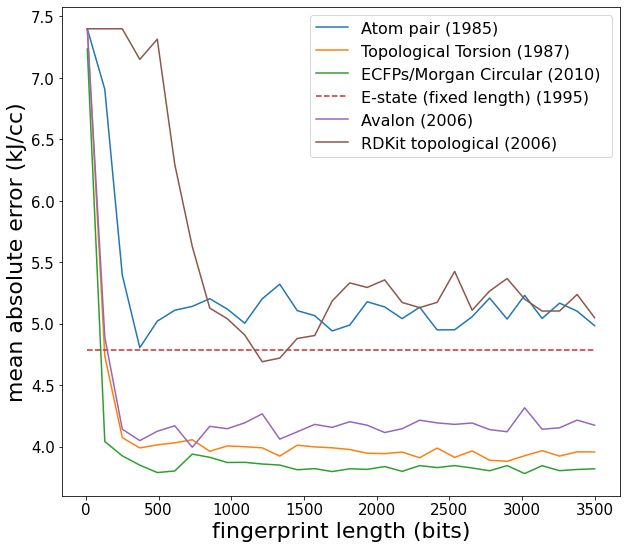

In [114]:
plt, scores_vs_size = test_fingerprint_vs_size(list(df_sum['Mols']), 
                                          KernelRidge(**{'alpha': 1e-4, 'gamma': 1e-4, 'kernel': 'rbf'}), verbose=True, 
                                           makeplot=True,  max_size=3500, num_sizes_to_test=30,
                                          model_name='Kernel Ridge Regression')

In [136]:
df_sum['Fingerprint'] = df_sum['Mols'].apply(fp_Estate_ints)
df_sum['Fingerprint'].shape

(879,)

In [137]:

X.shape

(879, 31)

In [138]:
#Scale X to unit variance and zero mean
df_sum['Fingerprint'] = df_sum['Mols'].apply(fp_Estate_ints)
X = np.stack(df_sum['Fingerprint'].values)

KRmodel = GridSearchCV(KernelRidge(), cv=5,
              param_grid={"alpha": np.logspace(-10, 1, 10),
             "gamma": np.logspace(-8, 0, 10),
              "kernel" : ['rbf', 'laplacian']},
             scoring='neg_mean_absolute_error', n_jobs=-1)


KRmodel = KRmodel.fit(X, y)
Best_KernelRidge = KRmodel.best_estimator_
print("Best Kernel Ridge model")
print(KRmodel.best_params_)
print(-1*KRmodel.best_score_)
#KRmodel.grid_scores_

Best Kernel Ridge model
{'alpha': 0.002154434690031887, 'gamma': 0.0002782559402207126, 'kernel': 'laplacian'}
6.255465054458718
